In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
np.random.seed(3)

## Components

# What do i want to show?
1. The model fit of a holistic autoencoder-predictor is better than the one which is fittet on a single components data. This is due to the fact, that one component has an influence on the other.
    - simulate three signals representing whether the component is active or not (causal factor of variation in the data)
    - simulate one or two signals for each components, relying on all the component signals with time lag.
    - Train two models:
        - For the somponents signals only
        - For all the components
2. The symptom can be localized better if we train individual decoder-predictors, than if we use the holistic decoder.
   - simulate a failure (e.g. one of the signals does not turn on even though the component is switched on.
   - Show, that the model fit of the individual models is capable of localizing the fault, wheras the holistic model is not.


## test dataset

In [3]:
from diag_vae.datamodule import DiagTsDataset

In [4]:
SEQ_LEN = 1000
COLS = [f"sig_{i+1}" for i in range(6)]
COLS_COMP_A = COLS[0:3] 
COLS_COMP_B = COLS[3:6] 

ds = DiagTsDataset(data_path='data/trainin_data.csv',
                   seq_len=SEQ_LEN,
                   cols=COLS,
                   comp_a_cols=COLS_COMP_A,
                   comp_b_cols=COLS_COMP_B)

In [5]:
ds.__getitem__(3)[1].shape

torch.Size([3, 1000])

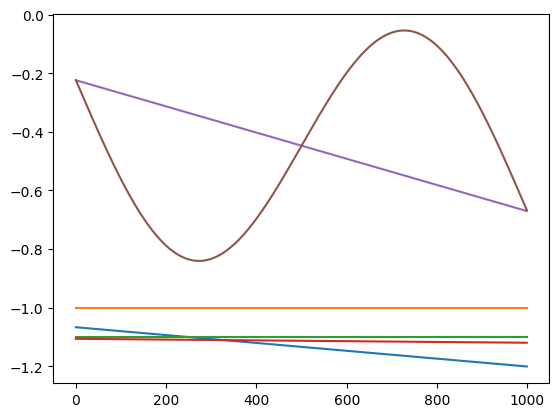

In [6]:
plt.plot(ds.__getitem__(500)[0].numpy().T)

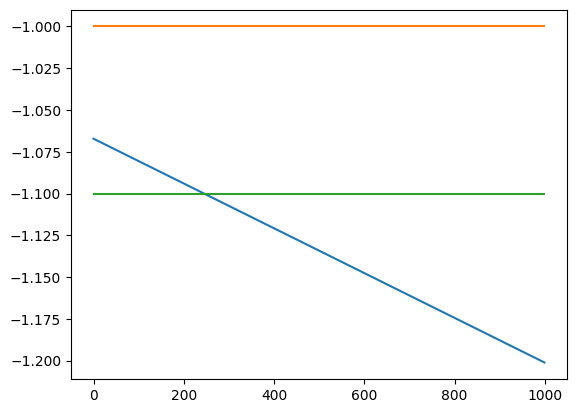

In [7]:
plt.plot(ds.__getitem__(500)[1].numpy().T)

## test data module

In [8]:
from diag_vae.datamodule import DiagTsDataModule

In [9]:
dm = DiagTsDataModule(    
        data_path="data/trainin_data.csv",
        seq_len=SEQ_LEN,
        cols=COLS,
    )
x , x_a, x_b= next(iter(dm.train_dataloader()))

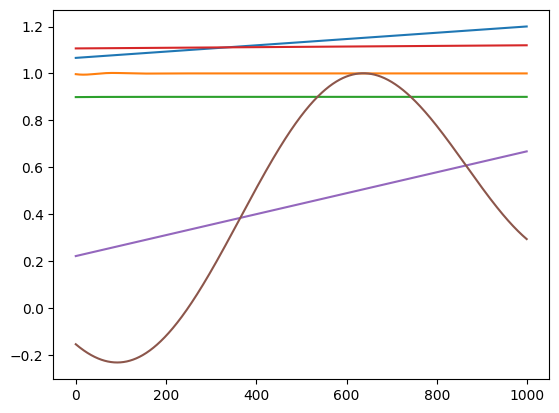

In [10]:
index = 6
plt.plot(x[index, :, :].numpy().T)

## check model output

In [14]:
from diag_vae.vanilla_tcn_ae import VanillaTcnAE


In [17]:
loggs_dir = 'logs/vanilla_tcn_ae/version_0//checkpoints'
checkpoint = os.path.join(loggs_dir, f'{os.listdir(loggs_dir)[0]}')
checkpoint
model = VanillaTcnAE.load_from_checkpoint(checkpoint)

z = model.encode(x)
x_hat = model.decode(z)


In [ ]:
for index in range(10, 18):
    fig, axs = plt.subplots(2, 2, sharey='all')
    axs[0, 0].plot(sample_x[index, :, :].detach().numpy().T)
    axs[1, 0].plot(sample_x_hat[index, :, :].detach().numpy().T)
    axs[0, 1].plot(sample_y[index, :, :].detach().numpy().T)
    axs[1, 1].plot(sample_y_hat[index, :, :].detach().numpy().T)
    print(index)
    fig.show()